In [0]:
  # Google Drive Mount

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive/Ybigta 팀 프로젝트

/content/gdrive/My Drive/Ybigta 팀 프로젝트


In [0]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

trans = pd.read_csv('train_transaction.csv')
iden = pd.read_csv('train_identity.csv')

# Starting from here!!

#목차
1. DataFrame explanations
2. Data preparation
3. 특이점 살펴보기

  1) Time Series와 Fraud간의 상관관계
  
  2) Card3가 Country일까 확인

## 1. DataFrame explanations
trans = train_transaction 데이터

iden = train_identity 데이터

temp = trans + 'Time'

Fraud = trans Data 중 isFraud==1

notFraud = trans Data 중 isFraud ==0

In [0]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## 2.data preparation

In [0]:
temp = trans.copy()

In [0]:
temp["TransactionDT"] = temp["TransactionDT"]/24/3600

In [0]:
temp["day"] = temp["TransactionDT"]//1

In [0]:
temp["hour"] = temp["TransactionDT"]%1*24//1

In [0]:
temp["min"] = (temp["TransactionDT"]%1*24)%1*60//1

In [0]:
temp["dayW"]=temp["day"]%7

In [0]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 398 entries, TransactionID to dayW
dtypes: float64(381), int64(3), object(14)
memory usage: 1.8+ GB


In [0]:
temp['TimeData'] = round((temp['hour']+(temp['min']/60)), 3)

In [0]:
Fraud = temp[temp['isFraud']==1]
notFraud = temp[temp['isFraud']==0]

# 3. 특이점 살펴보기

##1) Time Series와 Fraud간의 상관관계

In [0]:
temp.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,day,hour,min,dayW,TimeData
0,2987000,0,1.000000,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.000
1,2987001,0,1.000012,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0

In [0]:
Fraud.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,day,hour,min,TimeData,dayW
203,2987203,1,1.038889,445.000,W,18268,583.0,150.0,visa,226.0,credit,251.0,87.0,NaN,NaN,aol.com,NaN,2.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,2.0,57.0,57.0,52.0,0.0,NaN,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,374.0,NaN,NaN,NaN,M0,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,56.0,0.933,1.0
240,2987240,1,1.043900,37.098,C,13413,103.0,185.0,visa,137.0,credit,NaN,NaN,NaN,NaN,hotmail.com,hotmail.com,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,45.041664,0.041666,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0

### 내가 해봤던 수많은 visualization의 흔적 (나중에 코드 가져오기 위해서 남겨놓음)

In [0]:
temp.groupby('TimeData')[['dayW']].count()

In [0]:
#temp[temp['TimeData' == 0.017]].value_counts()
temp[temp["TimeData"]== 0.017]["dayW"].value_counts().sort_values(ascending=False)

In [0]:
c5_141 = temp[(temp['card5'] == 141)]

sns.countplot(x="TimeData", hue="isFraud", data=c5_141)

In [0]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
ax.hist(Fraud['hour'], bins=24, edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("hour")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(temp['hour'])))

In [0]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
ax.hist(notFraud['hour'], bins=24, edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("hour")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(temp['hour'])))

In [0]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()
ax.hist(Fraud['dayW'], bins=24, edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("DayW")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(temp['hour'])))

In [0]:
plt.figure(figsize=(12,6))
c5_141 = temp[(temp['card5'] == 141)
sns.countplot(x="dayW", data=c5_141)

In [0]:
plt.figure(figsize=(12,6))
sns.countplot(x="dayW", data=Fraud)

In [0]:
plt.figure(figsize=(12,6))
c5_137 = temp[(temp['card5'] == 137)]
sns.countplot(x="dayW", data=c5_137)

In [0]:
plt.figure(figsize=(12,6))
c5_138 = temp[(temp['card5'] == 138)]
sns.countplot(x="dayW", data=c5_138)

In [0]:
fig, ax = plt.subplots()
ax.hist(notFraud['hour'], bins=24, edgecolor='black')
ax.set_title("Histogram")
ax.set_xlabel("hour")
ax.set_ylabel("Percentage")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(temp['hour'])))

In [0]:
hour_bins=np.linspace(1,24,1)

Fraud_hist=np.histogram(Fraud['hour'],bins=hour_bins,range=(0,24))
not_Fraud_hist=np.histogram(notFraud['hour'],bins=hour_bins,range=(0,24))

Fraud_rates=Fraud_hist[0]/(Fraud_hist[0]+not_Fraud_hist[0])

plt.bar(hour_bins[:-1],Fraud_rates,width=hour_bins[1]-hour_bins[0])
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')

#plt.figure(figsize=(12,18))
#sns.countplot(x="hour", hue="isFraud", data=temp)

In [0]:
temp['hour'].hist()

In [0]:
c5_141 = temp[(temp['card5'] == 141)]

sns.countplot(x="hour", hue="isFraud", data=c5_141)

df = pd.DataFrame(dict(x=np.random.poisson(4, 500)))
ax = sns.barplot(x="x", y="x", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

In [0]:
c5_141 = temp[(temp['card5'] == 141)]

sns.countplot(x="min", hue="isFraud", data=c5_141)

In [0]:
c5_141 = temp[(temp['card5'] == 147)]

sns.countplot(x="hour", hue="isFraud", data=c5_141)

In [0]:
c5_141 = temp[(temp['card5'] == 137)]

sns.countplot(x="hour", hue="isFraud", data=c5_141)

In [0]:
sns.catplot(x="min", hue="hour", col="isFraud", 
            data=temp, kind="count", 
            height=4, aspect=.7)

## 2) Card3가 Country일까 확인

In [0]:
temp.card3.nunique()

114

In [0]:
temp.card3.describe()

count    588975.000000
mean        153.194925
std          11.336444
min         100.000000
25%         150.000000
50%         150.000000
75%         150.000000
max         231.000000
Name: card3, dtype: float64

In [0]:
temp.addr2.nunique()

74

In [0]:
temp.addr1.nunique()

332

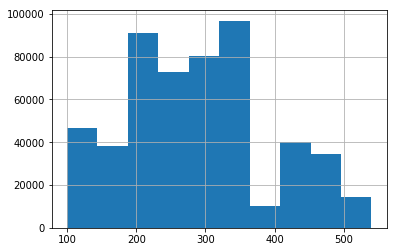

In [0]:
temp['addr1'].hist()

### 보면 한 값에 대다수의 값이 한 값에 몰려있음!

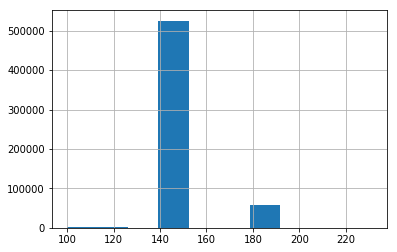

In [0]:
temp['card3'].hist()

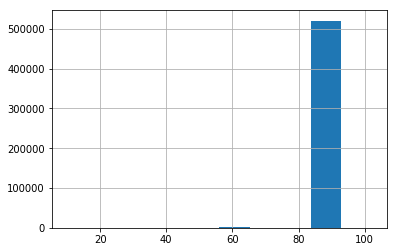

In [0]:
temp['addr2'].hist()

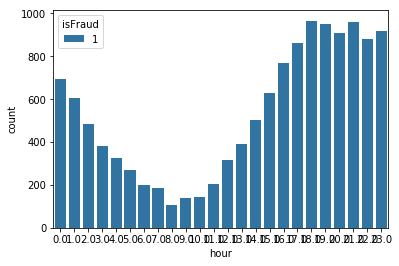

In [0]:
card3_check = Fraud[(Fraud['card3'] == 150)]
sns.countplot(x="hour", hue="isFraud", data=card3_check)

### 그래서 생각한 게 card3 = addr2 = country?

### addr2에 addr1가 종속되어있는 느낌!??

In [0]:
temp.head()

In [0]:
temp.groupby(['addr2', 'addr1']).size()

addr2  addr1
10.0   296.0        8
13.0   312.0        1
       430.0        5
       451.0        1
14.0   101.0        1
15.0   164.0        1
16.0   111.0        1
       152.0        7
       219.0        1
       261.0        1
       296.0       14
       307.0        4
       324.0        1
       330.0        1
       333.0        1
       341.0        3
       416.0        1
       425.0        1
       464.0        1
       482.0        6
       500.0        2
       504.0        9
       505.0        1
17.0   296.0        7
18.0   195.0        1
       296.0        2
19.0   148.0        2
       296.0       22
       403.0        3
       457.0        1
       477.0        3
       512.0        1
       516.0        1
20.0   296.0        3
21.0   360.0        4
       389.0        1
22.0   111.0        1
23.0   296.0        2
24.0   211.0        1
       262.0        1
       283.0        1
25.0   434.0        1
26.0   183.0        1
       190.0        1
       200.0       

In [0]:
# 우선 addr2 index별 사기거래 비중 파악하기!
a = (temp.groupby('addr2')[['isFraud']].sum()) / (temp.groupby('addr2')[['isFraud']]).count()
a.sort_values(by = 'isFraud')
b = temp.groupby('addr2')[['isFraud']].count()
# 전체 거래 대비 사기거래 비중은 3.5%
df = a.merge(b, how='right', on = 'addr2')
df = df.rename(columns = {'isFraud_x':'Percent'})
df = df.rename(columns = {'isFraud_y':'num'})

In [0]:
df.sort_values(by = 'num')

,Percent,num
addr2,,
75.0,1.000000,1
49.0,0.000000,1
50.0,0.000000,1
55.0,0.000000,1
35.0,0.000000,1
83.0,0.000000,1
89.0,0.000000,1
82.0,1.000000,1
79.0,0.000000,1


In [0]:
# addr2 중에서 지역별 사기거래 비중 파악
addr2_96 = temp[(temp['addr2'] == 96)]

a = (addr2_96.groupby('addr1')[['isFraud']].sum()) / (addr2_96.groupby('addr1')[['isFraud']]).count()
b = addr2_96.groupby('addr1')[['isFraud']].count()
df = a.merge(b, how='right', on = 'addr1')
df = df.rename(columns = {'isFraud_x':'Percent'})
df = df.rename(columns = {'isFraud_y':'num'})
df.sort_values(by='Percent')
# 사기 거래들이 특정 region에 몰려있는 것을 볼 수 있음!

,Percent,num
addr1,,
102.0,0.000000,13
515.0,0.000000,2
476.0,0.000000,2
448.0,0.000000,3
408.0,0.000000,5
385.0,0.000000,4
351.0,0.000000,2
349.0,0.000000,5
521.0,0.000000,6


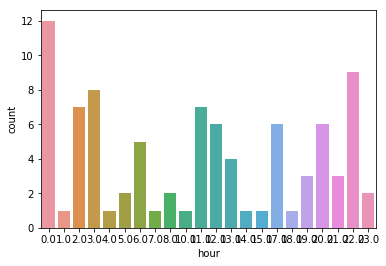

In [0]:
#addr2_96 (총 거래수 600여건) 시간에 따른 사기거래 건수 countplot
addr2_96 = Fraud[(Fraud['addr2'] == 96)]

sns.countplot(x="hour", data=addr2_96)

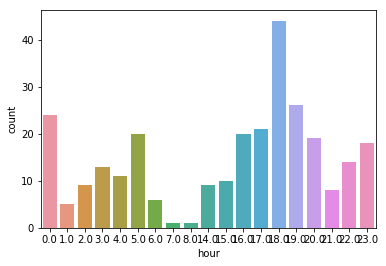

In [0]:
#addr2_60 (총 거래수 3천여건) 시간에 따른 사기거래 건수 countplot
addr2_60 = Fraud[(Fraud['addr2'] == 60)]

sns.countplot(x="hour", data=addr2_60)

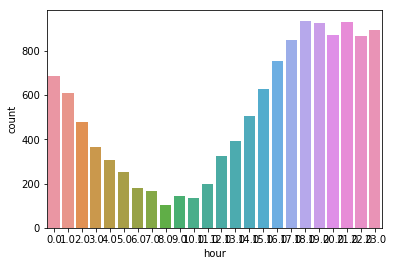

In [0]:
#addr2_87 (총 거래수 50만건) 시간에 따른 사기거래 건수 countplot
addr2_87 = Fraud[(Fraud['addr2'] == 87)]

sns.countplot(x="hour", data=addr2_87)